# Cálculo de la energía solar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

Como el ejemplo lo habiamos hecho en el crash además de agregar que se guarde en la ruta especificada, agregué la integración con scipy para:
1. mostrar la importacion de un módulo en específico
2. ver alternativas con paqueterias


In [2]:
sol = pd.read_csv("../data/001_raw/temixco.csv", index_col=0, usecols=[0,2], parse_dates=True)
sol.head()

,Ig
time,
2018-01-01 00:00:00,NaN
2018-01-01 00:10:00,0.0
2018-01-01 00:20:00,0.0
2018-01-01 00:30:00,0.0
2018-01-01 00:40:00,0.0


In [3]:
sol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ig      52423 non-null  float64
dtypes: float64(1)
memory usage: 821.2 KB


In [4]:
sol.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-12-31 22:20:00', '2018-12-31 22:30:00',
               '2018-12-31 22:40:00', '2018-12-31 22:50:00',
               '2018-12-31 23:00:00', '2018-12-31 23:10:00',
               '2018-12-31 23:20:00', '2018-12-31 23:30:00',
               '2018-12-31 23:40:00', '2018-12-31 23:50:00'],
              dtype='datetime64[ns]', name='time', length=52560, freq=None)

In [5]:
sol.dtypes

Ig    float64
dtype: object

$$E = \sum I_g \triangle t$$

In [6]:
sol.isna().sum()

Ig    137
dtype: int64

In [7]:
sol.dropna(inplace=True)
sol

,Ig
time,
2018-01-01 00:10:00,0.0
2018-01-01 00:20:00,0.0
2018-01-01 00:30:00,0.0
2018-01-01 00:40:00,0.0
2018-01-01 00:50:00,0.0
...,...
2018-12-31 23:10:00,0.0
2018-12-31 23:20:00,0.0
2018-12-31 23:30:00,0.0


In [8]:
energia = sol.resample('Y').sum()*(1/6)

<AxesSubplot:xlabel='time'>

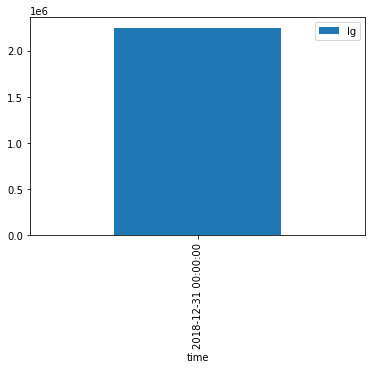

In [9]:
energia.plot(kind='bar')

In [10]:
energia.to_csv("../data/002_processed/anual.csv")

In [11]:
sol.resample('Y').sum()*(1/6)

,Ig
time,
2018-12-31,2.249072e+06


In [12]:
sol.resample('M').sum()*(1/6)

,Ig
time,
2018-01-31,154389.530000
2018-02-28,165154.764833
2018-03-31,210929.394500
2018-04-30,208247.937000
2018-05-31,201045.636000
2018-06-30,188856.912667
2018-07-31,231000.292667
2018-08-31,213135.706667
2018-09-30,198165.847000


In [14]:
sol.resample('D').sum()*(1/6)

,Ig
time,
2018-01-01,4692.693333
2018-01-02,4976.943667
2018-01-03,4839.385667
2018-01-04,4899.825833
2018-01-05,4846.022000
...,...
2018-12-27,4706.769167
2018-12-28,4510.652333
2018-12-29,5311.973167


In [15]:
def calcular_energia(df, time, nombre):
    """Guarda los valores en un csv con el nombre especificado en la ruta indicada 
    Input:  df, 
            time = periodo, string
            nombre = nombre del archivo en csv, string
    Output: archivo csv, 
            df con los valores de energía en cada periodo
    """
    df.to_csv(f"../data/002_processed/{nombre}.csv")
    return df.resample(time).sum()*(1/6)


In [16]:
calcular_energia(sol,"Y","anual")

,Ig
time,
2018-12-31,2.249072e+06


In [23]:
%%time
## Usando scipy
integrate.trapezoid(y = sol.Ig)*(1/6)

Wall time: 984 µs


2249072.0231666663

In [24]:
%%time
sol.resample('Y').sum()*(1/6)

Wall time: 3.44 ms


,Ig
time,
2018-12-31,2.249072e+06


In [28]:
energias = []

mes = 1
while mes <= 12:
    print(integrate.trapezoid(y=sol.loc[f"2018-{mes}"].Ig)*(1/6))
    mes+=1

154389.52999999997
165154.76483333332
210929.39449999997
208247.93699999998
201045.636
188854.94266666664
231000.28366666666
213135.55925
198165.84699999998
180522.43016666663
144312.36966666667
153311.202


In [29]:
sol.resample('M').sum()*(1/6)

,Ig
time,
2018-01-31,154389.530000
2018-02-28,165154.764833
2018-03-31,210929.394500
2018-04-30,208247.937000
2018-05-31,201045.636000
2018-06-30,188856.912667
2018-07-31,231000.292667
2018-08-31,213135.706667
2018-09-30,198165.847000
